# Final Report

Transplant the necessary code from `eda.ipynb` to this notebook, and clean everything up for presentation!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
onebedroom = pd.read_csv('data/City_MedianRentalPrice_1Bedroom.csv')
fourbedroom = pd.read_csv('data/City_MedianRentalPrice_4Bedroom.csv')
onebedroom['bedrooms'] = 1
fourbedroom['bedrooms'] = 4

In [3]:
onebedroom.shape

(818, 126)

In [4]:
fourbedroom.shape

(316, 126)

In [5]:
#find unique values of city, I believe this is why onebedroom has 500+ rows
onebedroom.RegionName.nunique()

773

In [6]:
fourbedroom.RegionName.nunique()

309

In [7]:
# All Rentals DF:
rentals = pd.concat([onebedroom, fourbedroom])

In [8]:
rentals.head(30)


Unnamed: 0     RegionName State  \
0            0       New York    NY   
1            1    Los Angeles    CA   
2            2        Houston    TX   
3            3        Chicago    IL   
4            4    San Antonio    TX   
5            5   Philadelphia    PA   
6            6        Phoenix    AZ   
7            7      Las Vegas    NV   
8            8      San Diego    CA   
9            9         Dallas    TX   
10          10         Austin    TX   
11          11       San Jose    CA   
12          12   Jacksonville    FL   
13          13   Indianapolis    IN   
14          14  San Francisco    CA   
15          15      Charlotte    NC   
16          16     Fort Worth    TX   
17          17         Tucson    AZ   
18          18       Columbus    OH   
19          19     Louisville    KY   
20          20        Orlando    FL   
21          21        El Paso    TX   
22          22         Denver    CO   
23          23        Seattle    WA   
24          24        Memphis    TN   
25          25         Boston    MA   
26          26     Washington    DC   
27          27       Portland    OR   
28          28      Nashville    TN   
29          29     Sacramento    CA   

                                         Metro            CountyName  \
0                  New York-Newark-Jersey City         Queens County   
1               Los Angeles-Long Beach-Anaheim    Los Angeles County   
2             Houston-The Woodlands-Sugar Land         Harris County   
3                     Chicago-Naperville-Elgin           Cook County   
4                    San Antonio-New Braunfels          Bexar County   
5               Philadelphia-Camden-Wilmington   Philadelphia County   
6                      Phoenix-Mesa-Scottsdale       Maricopa County   
7                 Las Vegas-Henderson-Paradise          Clark County   
8                           San Diego-Carlsbad      San Diego County   
9                  Dallas-Fort Worth-Arlington         Dallas County   
10                           Austin-Round Rock         Travis County   
11              San Jose-Sunnyvale-Santa Clara    Santa Clara County   
12                                Jacksonville          Duval County   
13                Indianapolis-Carmel-Anderson         Marion County   
14               San Francisco-Oakland-Hayward  San Francisco County   
15                  Charlotte-Concord-Gastonia    Mecklenburg County   
16                 Dallas-Fort Worth-Arlington        Tarrant County   
17                                      Tucson           Pima County   
18                                    Columbus       Franklin County   
19                 Louisville/Jefferson County      Jefferson County   
20                   Orlando-Kissimmee-Sanford         Orange County   
21                                     El Paso        El Paso County   
22                      Denver-Aurora-Lakewood         Denver County   
23                     Seattle-Tacoma-Bellevue           King County   
24                                     Memphis         Shelby County   
25                     Boston-Cambridge-Newton        Suffolk County   
26             Washington-Arlington-Alexandria  District of Columbia   
27                Portland-Vancouver-Hillsboro      Multnomah County   
28  Nashville-Davidson--Murfreesboro--Franklin       Davidson County   
29         Sacramento--Roseville--Arden-Arcade     Sacramento County   

    SizeRank  2010-02  2010-03  2010-04  2010-05  ...  2019-04  2019-05  \
0          1      NaN      NaN      NaN   2250.0  ...   2400.0   2400.0   
1          2      NaN      NaN      NaN      NaN  ...   2395.0   2370.0   
2          3      NaN      NaN      NaN      NaN  ...   1270.0   1269.0   
3          4      NaN      NaN      NaN      NaN  ...   1650.0   1650.0   
4          5      NaN      NaN      NaN      NaN  ...    981.0    985.0   
5          6      NaN      NaN      NaN      NaN  ...   1525.0   1496.0   
6          7      NaN      NaN      

In [9]:
rentals.drop('Unnamed: 0', inplace=True, axis=1)
rentals.head()

RegionName State                             Metro          CountyName  \
0     New York    NY       New York-Newark-Jersey City       Queens County   
1  Los Angeles    CA    Los Angeles-Long Beach-Anaheim  Los Angeles County   
2      Houston    TX  Houston-The Woodlands-Sugar Land       Harris County   
3      Chicago    IL          Chicago-Naperville-Elgin         Cook County   
4  San Antonio    TX         San Antonio-New Braunfels        Bexar County   

   SizeRank  2010-02  2010-03  2010-04  2010-05  2010-06  ...  2019-04  \
0         1      NaN      NaN      NaN   2250.0   2369.0  ...   2400.0   
1         2      NaN      NaN      NaN      NaN      NaN  ...   2395.0   
2         3      NaN      NaN      NaN      NaN      NaN  ...   1270.0   
3         4      NaN      NaN      NaN      NaN      NaN  ...   1650.0   
4         5      NaN      NaN      NaN      NaN      NaN  ...    981.0   

   2019-05  2019-06  2019-07  2019-08  2019-09  2019-10  2019-11  2019-12  \
0   2400.0   2450.0   2450.0   2475.0   2475.0   2400.0   2400.0   2425.0   
1   2370.0   2395.0   2395.0   2400.0   2425.0   2350.0   2330.0   2340.0   
2   1269.0   1286.0   1275.0   1275.0   1270.0   1264.0   1245.0   1249.0   
3   1650.0   1634.0   1600.0   1582.0   1595.0   1542.0   1550.0   1550.0   
4    985.0    999.0   1000.0   1000.0    991.0    985.0    974.5    967.5   

   bedrooms  
0         1  
1         1  
2         1  
3         1  
4         1  

[5 rows x 125 columns]

In [10]:
rentals.dtypes

RegionName     object
State          object
Metro          object
CountyName     object
SizeRank        int64
               ...   
2019-09       float64
2019-10       float64
2019-11       float64
2019-12       float64
bedrooms        int64
Length: 125, dtype: object

In [11]:
# Will need to convert dates to date obj (will do in smaller df's) not in column names

rentals.head(1)

RegionName State                        Metro     CountyName  SizeRank  \
0   New York    NY  New York-Newark-Jersey City  Queens County         1   

   2010-02  2010-03  2010-04  2010-05  2010-06  ...  2019-04  2019-05  \
0      NaN      NaN      NaN   2250.0   2369.0  ...   2400.0   2400.0   

   2019-06  2019-07  2019-08  2019-09  2019-10  2019-11  2019-12  bedrooms  
0   2450.0   2450.0   2475.0   2475.0   2400.0   2400.0   2425.0         1  

[1 rows x 125 columns]

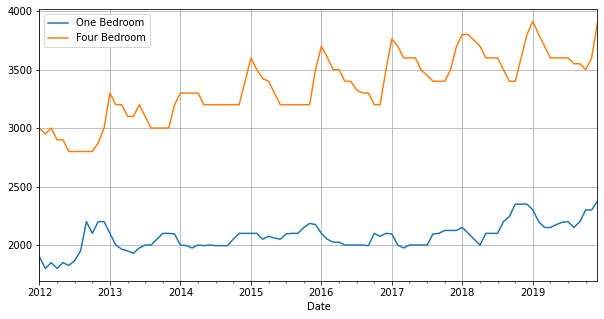

In [39]:
def get_city_data(city_name):
    city_data = rentals [rentals['RegionName'] == city_name]
    city_data = city_data.drop(city_data.columns[[0, 1, 2, 3, 4, 5]], axis=1)

    dates1 = []
    rental_prices1 = []
    rental_prices2 = []

    for col in city_data:
        dates1.append(col)

    city_df = pd.DataFrame(dates1, columns = ['Date'])

    # ONE BEDROOM PRICES
    for price in city_data.iloc[0]:
        rental_prices1.append(price)

    # FOUR BEDROOM PRICES
    for price in city_data.iloc[1]:
        rental_prices2.append(price)

    city_df['One Bedroom'] = rental_prices1
    city_df['Four Bedroom'] = rental_prices2
    
    # DROP BEDROOM VAL
    city_df.drop(city_df.tail(1).index, inplace=True)

    #################

    # CLEAN DATA
    city_df = city_df.dropna()


    ##################

    # CONVERT DATES TO DATETIME
    city_df.Date = city_df.Date.apply(pd.to_datetime, errors='coerce')


    ###################
    return city_df

    ##########

boston = get_city_data('Boston')

##################
# Plot Function


def get_city_line(data_frame):
    data_frame.plot(kind='line', x="Date", y=["One Bedroom", "Four Bedroom"], figsize=(10,5), grid=True)
    
get_city_line(boston)

In [15]:
### THOUGHTS:

### September prices are highest - when majority of leases renew / college students return

## Summer rental prices look low for 4 bedrooms - while there's a possible increase in 1 bedrooms?

## Are end of year rentals high because of low inventory?/no one moving during winter?



In [30]:
san_diego = get_city_data('San Diego')
san_diego.shape

(105, 3)

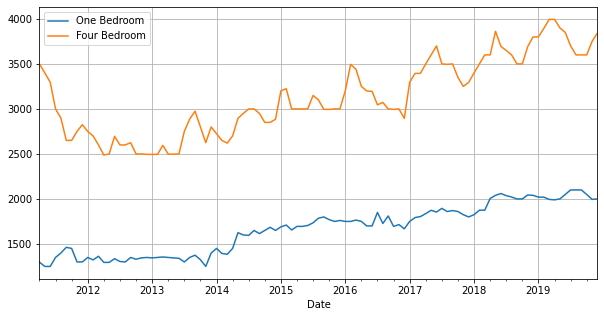

In [34]:
get_city_line(san_diego)

In [35]:
new_york = get_city_data('New York')
new_york.shape

(65, 3)

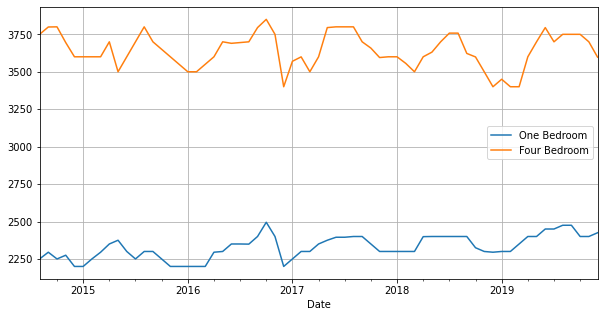

In [36]:
get_city_line(new_york)